# #Leb3

-3.0  -2.9  -2.8  -2.7  -2.6  -2.5  -2.4  -2.3  -2.2  -2.1  -2.0  -1.9  -1.8  -1.7  -1.6  -1.5  -1.4  -1.3  -1.2  -1.1  -1.0  -0.9  -0.8  -0.7  -0.6  -0.5  -0.4  -0.3  -0.2  -0.1  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0  1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.0  4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  

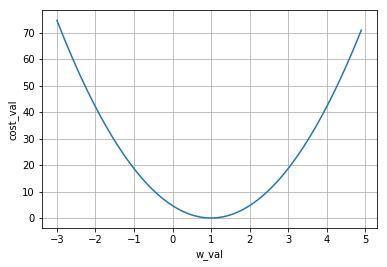

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [1, 2, 3]

w = tf.placeholder(tf.float32)
# b= tf.Variable(tf.random_normal([1]), name='bias')
hypothesis = x * w


cost = tf.reduce_mean(tf.square(hypothesis - y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# append() 할려면 타입 선언먼저 해야함
w_val = []
cost_val = []

# [-30, 50]이 아니라 [-3, 5]로 해버리면 데이터 너무 없어서 직선그래프나옴
"""
for i in range(-3, 5):
    feed_w = i
    curr_cost, curr_w = sess.run([cost, w], feed_dict = {w: feed_w})
    w_val.append(curr_w)
    cost_val.append(curr_cost)

plt.plot(w_val, cost_val)
plt.grid()
plt.xlabel('w_val')
plt.ylabel('cost_val')
plt.show()

tf.reset_default_graph()
"""
for i in range(-30, 50):
    feed_w = i * 0.1
    curr_cost, curr_w = sess.run([cost, w], feed_dict = {w: feed_w})
    print(curr_w ," ", end="")
    w_val.append(curr_w)
    cost_val.append(curr_cost)

plt.plot(w_val, cost_val)
plt.grid()
plt.xlabel('w_val')
plt.ylabel('cost_val')
plt.show()
    


# w 값 조정

In [28]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal([1]), name="weight")

hypothesis = x * w

cost = tf.reduce_mean(tf.square(hypothesis -y))


##### w 값 조정#####
# cost minimize 값 우리가 정의함

learning_rate = 0.1
gradient = tf.reduce_mean((w * x - y)*x)
descent = w - learning_rate * gradient
update = w.assign(descent)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# update 반복문안에 넣음
for step in range(2001):
    sess.run(update, feed_dict = {x: [1, 2, 3], y: [1, 2, 3]})
    if step % 200 == 0:
        print(step, sess.run(cost, feed_dict={x: [1, 2, 3], y:[1, 2, 3]}),
              sess.run(w))
            
       
             

0 0.17307222 [0.8074204]
200 0.0 [1.]
400 0.0 [1.]
600 0.0 [1.]
800 0.0 [1.]
1000 0.0 [1.]
1200 0.0 [1.]
1400 0.0 [1.]
1600 0.0 [1.]
1800 0.0 [1.]
2000 0.0 [1.]


# gradient 값 조정

gvs 값 바꿔보면 나옴

In [22]:
tf.reset_default_graph()

x = [1, 2, 3]
y = [1, 2, 3]

#x = tf.placeholder(tf.float32)
#y = tf.placeholder(tf.float32)

#높은 값 5.0으로 둬봄
w = tf.Variable(5.)

hypothesis = x * w

# 우리가 짠 gradient
# gradient = tf.reduce_mean((w * x -y) * x) * 2
gradient = tf.reduce_mean((w * x -y) * x)
cost = tf.reduce_mean(tf.square(hypothesis - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# 원래 있는 gradient 계산
gvs = optimizer.compute_gradients(cost)
apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# apply_gradient 반복문안에 넣음
for step in range(100):
    print(step, sess.run([gradient, w, gvs]))    
    sess.run(apply_gradients)
    
# gradient = 0
# w = 1
# gvs = [gradient, w]

# Q. gradient가 왜 1이아니라 0
    

0 [18.666666, 5.0, [(37.333336, 5.0)]]
1 [16.924444, 4.6266665, [(33.84889, 4.6266665)]]
2 [15.344829, 4.2881775, [(30.689657, 4.2881775)]]
3 [13.912643, 3.9812808, [(27.825287, 3.9812808)]]
4 [12.614131, 3.703028, [(25.228264, 3.703028)]]
5 [11.4368105, 3.4507453, [(22.873623, 3.4507453)]]
6 [10.369376, 3.2220092, [(20.738752, 3.2220092)]]
7 [9.401568, 3.0146217, [(18.803137, 3.0146217)]]
8 [8.524088, 2.8265903, [(17.048176, 2.8265903)]]
9 [7.7285066, 2.6561086, [(15.457014, 2.6561086)]]
10 [7.0071797, 2.5015385, [(14.01436, 2.5015385)]]
11 [6.353176, 2.361395, [(12.706352, 2.361395)]]
12 [5.7602134, 2.2343314, [(11.520427, 2.2343314)]]
13 [5.222593, 2.119127, [(10.445186, 2.119127)]]
14 [4.735151, 2.0146751, [(9.470302, 2.0146751)]]
15 [4.2932034, 1.9199722, [(8.586407, 1.9199722)]]
16 [3.8925045, 1.8341081, [(7.785009, 1.8341081)]]
17 [3.5292041, 1.756258, [(7.0584083, 1.756258)]]
18 [3.199812, 1.685674, [(6.399624, 1.685674)]]
19 [2.9011629, 1.6216778, [(5.8023257, 1.6216778)]]
20 